## 簡單線性迴歸模型

* y = β0+β1x     <br> β0：截距(Intercept)，β1：斜率(Slope)為 x變動一個單位y變動的量


* 優點 : 快速,不需參數,容易理解
* 缺點 : 相較其他複雜模型，其預測率不是太高

#### 模型績效評估指標 
* 平均絕對誤差(Mean Absolute Error, MAE)
* 均方誤差(Mean Squared Error, MSE)
* 均方根誤差(Root Mean Squared Error, RMSE)

#### Example 1 珍奶銷售量預測

In [84]:
import numpy as np
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
bubbleTea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])

print(temperatures)
print(temperatures.shape)
print(bubbleTea_sales)
print(bubbleTea_sales.shape)

# 轉換維度
temperatures = np.reshape(temperatures, (len(temperatures), 1))
#temperatures = temperatures.reshape(-1,1)

bubbleTea_sales = np.reshape(bubbleTea_sales, (len(bubbleTea_sales), 1)) 
#bubbleTea_sales =bubbleTea_sales.reshape(-1,1)
print("----")
print(temperatures)
print(temperatures.shape)
print(bubbleTea_sales)
print(bubbleTea_sales.shape)

[29 28 34 31 25 29 32 31 24 33 25 31 26 30]
(14,)
[77 62 93 84 59 64 80 75 58 91 51 73 65 84]
(14,)
----
[[29]
 [28]
 [34]
 [31]
 [25]
 [29]
 [32]
 [31]
 [24]
 [33]
 [25]
 [31]
 [26]
 [30]]
(14, 1)
[[77]
 [62]
 [93]
 [84]
 [59]
 [64]
 [80]
 [75]
 [58]
 [91]
 [51]
 [73]
 [65]
 [84]]
(14, 1)


In [85]:
Linear = LinearRegression()
Linear.fit(temperatures,bubbleTea_sales)

# 印出係數
print(Linear.coef_)

# 印出截距
print(Linear.intercept_ )

[[3.73788546]]
[-36.36123348]


In [90]:
# 新的氣溫資料進行預測
to_be_predicted = np.array([31]).reshape(-1,1)
print(to_be_predicted)

predicted_sales = Linear.predict(to_be_predicted)

# 預測的珍珠奶銷量
print(predicted_sales)

[[31]]
[[79.51321586]]


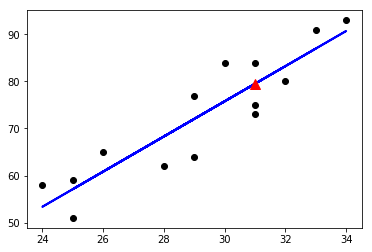

In [87]:
import matplotlib.pyplot as plt

# 視覺化
plt.scatter(temperatures, bubbleTea_sales, color='black',)
plt.plot(temperatures, Linear.predict(temperatures), color='blue', linewidth=2)
plt.plot(to_be_predicted, predicted_sales, color = 'red', marker = '^', markersize = 10)
plt.show()

In [88]:
# 模型績效
mse = np.mean((Linear.predict(temperatures) - bubbleTea_sales) ** 2)
r_squared = Linear.score(temperatures,bubbleTea_sales)

# 印出模型績效
print("MSE = ",mse)
print("R-Square = ",r_squared)

MSE =  27.934864694776564
R-Square =  0.8225092881166945


## 分群 (Clustering)

* 為一種非監督式學習 => 訓練資料沒有預先定義的標籤
* 目的在於找出資料中相似的幾個群聚，在同一個子集中的成員對象都有相似的一些屬性

#### make_blobs

* 根據使用者指定的特徵數量、中心點數量、範圍等參數生成一個N類資料集和對應標籤

* sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

參數|說明
------|------
n_samples|待生成的樣本總數
n_features|每個樣本的特徵數
centers|類別數
cluster_std|每個類別的方差
center_box|中心確定之後的資料邊界，default value : (-10.0, 10.0)
shuffle | 打亂 default value : True
random_state | 相同的值重覆機率


In [5]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=100,n_features=2,centers=4,cluster_std=1,center_box=(-10.0,10.0),shuffle=True,random_state=None)

In [6]:
X

array([[ -2.82883627,  -8.4147082 ],
       [  1.93297637, -10.77464672],
       [  0.73104033,  -8.46943249],
       [  7.12048767,  -0.36692691],
       [ -5.80136749,   4.58365472],
       [  6.65105086,  -1.6475356 ],
       [ -4.06645944,  -7.50539924],
       [ -5.24276447,   6.17885281],
       [ -6.70508896,   3.76143153],
       [ -3.04091002,  -7.24858714],
       [ -5.89238404,   5.55850597],
       [ -3.86091037,   4.58710116],
       [  1.08497518, -10.88787723],
       [ -4.72358009,  -8.6214357 ],
       [  0.54713631,  -9.46870851],
       [  8.06300699,  -2.16996947],
       [ -3.67111725,  -8.01999215],
       [ -3.97585692,  -8.34560579],
       [ -2.04522084,   4.45168715],
       [  0.02825295, -10.08540686],
       [ -3.46194675,   3.85161595],
       [  0.41187093,  -8.9241659 ],
       [ -3.93303791,   6.14026408],
       [ -4.7823898 ,  -6.41791082],
       [  9.66736429,  -0.19659321],
       [  1.74342876, -10.33476423],
       [  1.0236433 ,  -9.17495508],
 

In [7]:
y

array([1, 3, 3, 0, 2, 0, 1, 2, 2, 1, 2, 2, 3, 1, 3, 0, 1, 1, 2, 3, 2, 3,
       2, 1, 0, 3, 3, 0, 3, 2, 2, 1, 2, 3, 0, 1, 1, 1, 0, 0, 3, 3, 3, 1,
       0, 3, 2, 2, 0, 3, 3, 3, 1, 0, 0, 2, 2, 1, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 1, 1, 0, 3, 2, 3, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 3, 0, 2, 0,
       1, 3, 1, 2, 1, 0, 3, 3, 1, 0, 1, 0])

In [8]:
import matplotlib.pyplot as plt

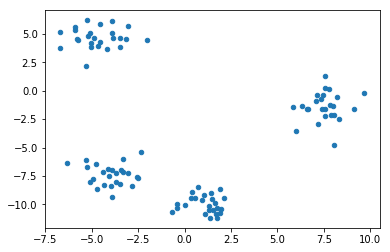

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], s=20, marker='o')

### K平均演算法 (K-means algorithm)

* 把n個點劃分到k個聚類中，使每個點都有屬於一個離它最近的均值(聚類中心)對應的聚類 (利用向量距離來做聚類)，以作為分群的標準
* 已知觀測集(x1,x2,...,xn)，其中每個觀測都是一個d-維實向量，k-平均聚類要把這n個觀測劃分到k個集合中(k≤n),使得組內平方和（WCSS within-cluster sum of squares）最小

#### Scikit-learn K-Means
sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)

參數 | 說明
------|------
n_clusters |聚類中心數量, default : 8
init | 'k-means++   <br>'random':隨機選擇K個instance做為中心 <br>ndarray : 如傳入為矩陣（ndarray），則將該矩陣的每一行作為聚類中心
n_init |隨機運行的次數 default: 10
max_iter |運行的最大迭代次數 default: 300
tol | 容忍的最小誤差,誤差小於tol則退出迭代 default: 1e-4
precompute_distances | 是否將資料全載入到記憶體內計算，可選{'auto', True, False}
n_jobs| 同時進行運算的核数
verbose|是否輸出詳細訊息,default : 0 
random_state|用於隨機產生中心的隨機序列
copy_x|是否將資料複製一份進行運算
algorithm |距離計算方式，可選{"auto", "full" or "elkan",default="auto"}<br>full : 傳統距離計算公式 <br> elkan : 使用三角不等式 <br> auto : 為稀疏矩陣時使用full，否則使用elkan

方法|說明
------|------
fit（X）|進行訓練
predict(X) | 進行新數據類別的預測


In [17]:
from sklearn.cluster import KMeans

n_clusters = 3

kmean = KMeans(n_clusters=n_clusters) 

kmean.fit(X) #進行訓練
#kmean.fit_predict(X) # 先對X進行訓練並預測X中每個實例(instance)的類別


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
print("k={}, cost ={}".format(n_clusters,int(kmean.score(X)))) #計算誤差

k=3, cost =-586


In [19]:
labers = kmean.labels_ 
centers = kmean.cluster_centers_
markers = ['o','^','*']
colors = ['r','b','y']
print(X[labers])

[[ -2.82883627  -8.4147082 ]
 [ -2.82883627  -8.4147082 ]
 [ -2.82883627  -8.4147082 ]
 [  0.73104033  -8.46943249]
 [  1.93297637 -10.77464672]
 [  0.73104033  -8.46943249]
 [ -2.82883627  -8.4147082 ]
 [  1.93297637 -10.77464672]
 [  1.93297637 -10.77464672]
 [ -2.82883627  -8.4147082 ]
 [  1.93297637 -10.77464672]
 [  1.93297637 -10.77464672]
 [ -2.82883627  -8.4147082 ]
 [ -2.82883627  -8.4147082 ]
 [ -2.82883627  -8.4147082 ]
 [  0.73104033  -8.46943249]
 [ -2.82883627  -8.4147082 ]
 [ -2.82883627  -8.4147082 ]
 [  1.93297637 -10.77464672]
 [ -2.82883627  -8.4147082 ]
 [  1.93297637 -10.77464672]
 [ -2.82883627  -8.4147082 ]
 [  1.93297637 -10.77464672]
 [ -2.82883627  -8.4147082 ]
 [  0.73104033  -8.46943249]
 [ -2.82883627  -8.4147082 ]
 [ -2.82883627  -8.4147082 ]
 [  0.73104033  -8.46943249]
 [ -2.82883627  -8.4147082 ]
 [  1.93297637 -10.77464672]
 [  1.93297637 -10.77464672]
 [ -2.82883627  -8.4147082 ]
 [  1.93297637 -10.77464672]
 [ -2.82883627  -8.4147082 ]
 [  0.73104033

In [20]:
# 輸出中心點位置
print(centers)

[[-1.45099982 -8.67919839]
 [-4.69579415  4.65656814]
 [ 7.52234809 -1.40696855]]


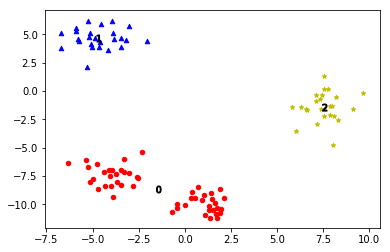

In [21]:
# 視覺化呈現

plt.figure(figsize=(6,4))

for c in range(n_clusters):
    cluster = X[labers == c]
    plt.scatter(cluster[:,0],cluster[:,1],marker=markers[c],s=20,c=colors[c])

#輸出中心點
for i,c in enumerate(centers):
    plt.scatter(c[0],c[1],marker ='$%d$' % i, s=50, c='black')
    

In [22]:
#對新數據進行預測
print(kmean.predict([[10, 7]]))

[2]


#### 優點
* 對異常值有較高的容忍度

#### 缺點
* 計算量較大, 對記憶體需求較高
* 每次對一個未標記樣本進行分類時,需要全部計算一遍距離

In [51]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[-2,2],[2,2],[0,4]]
X , Y = make_blobs(n_samples = 40 , centers = centers, random_state = 0 , cluster_std =0.5) 
print(X)
print(Y)

[[ 1.1468649   2.9753877 ]
 [ 0.03325861  4.15123595]
 [-0.01409111  4.21416594]
 [-3.27649491  2.3268093 ]
 [-1.51063101  3.1204466 ]
 [-0.31716105  3.81862942]
 [-1.77806838  2.16683716]
 [ 2.07747371  2.18908126]
 [-1.61948114  2.06083751]
 [ 1.55610713  1.00960177]
 [-1.84346615  1.57295213]
 [-1.92797821  2.72713675]
 [ 1.37360232  2.38874518]
 [ 1.74517391  1.78096285]
 [-0.45364918  4.0259727 ]
 [ 2.61514534  2.60118992]
 [ 1.82604393  2.07817448]
 [-0.40657314  3.1368587 ]
 [-1.5677819   1.62891749]
 [-0.81509917  4.23139113]
 [ 1.55226672  2.19345125]
 [-2.05160943  2.20529925]
 [-1.11797383  2.2000786 ]
 [ 2.76638961  2.73467938]
 [-0.86512269  1.27281716]
 [ 0.36454528  4.06449146]
 [ 1.47572352  1.28999103]
 [ 0.20117082  3.65759495]
 [ 0.56970034  3.38258709]
 [ 1.74459743  1.40968391]
 [ 0.08871307  3.79910953]
 [ 1.80633659  1.84884862]
 [-1.25296046  1.89742087]
 [-0.15577627  4.02808267]
 [-0.43539857  3.71057517]
 [-1.52495579  1.9243214 ]
 [-1.066221    1.51136106]
 

c:\users\lifeplus\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


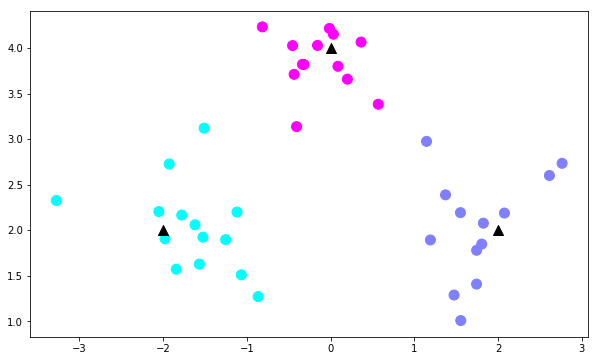

In [52]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, cmap='cool') #畫出樣本分布
c = np.array(centers)
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='black') #劃出中心點

#### 使用 KNN 進行分類 

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
# 訓練模型
k = 10 
clf = KNeighborsClassifier(n_neighbors=k) 
clf.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [56]:
# 進行新樣本預測

sample_x = np.array([3, 5]).reshape(1, -1)
sample_y = clf.predict(sample_x)
neighbors = clf.kneighbors(sample_x, return_distance=False);
print("屬於類別 : " ,sample_y)
print(neighbors)

屬於類別 :  [1]
[[23 15  0 25 28  7 12  1 27  2]]


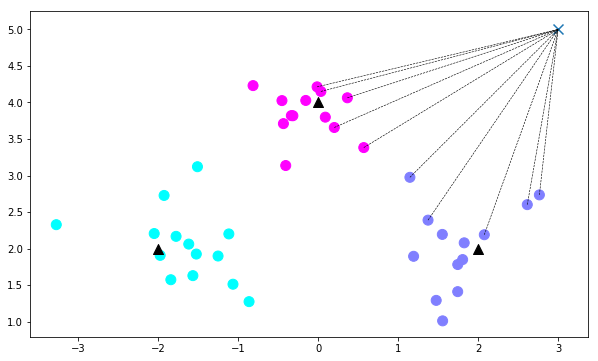

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, cmap='cool')    # 劃出sample
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='k')   # 劃出中心點
plt.scatter(sample_x[0][0], sample_x[0][1], marker="x", s=100, cmap='cool')    #帶預測的點 

for i in neighbors[0]:
    # 與預測點距離最近的 N個樣本連線
    plt.plot([X[i][0], sample_x[0][0]], [X[i][1], sample_x[0][1]],'k--', linewidth=0.6);

#### 使用 KNN 進行迴歸預測

In [59]:
from sklearn.neighbors import KNeighborsRegressor

In [60]:
import matplotlib.pyplot as plt
import numpy as np

n_dots = 40
X = 5 * np.random.rand(n_dots, 1)
y = np.cos(X).ravel()


y += 0.3 * np.random.rand(n_dots) + 0.1

In [61]:
# 訓練模型
from sklearn.neighbors import KNeighborsRegressor
k = 10
knn = KNeighborsRegressor(k)
knn.fit(X, y);

In [62]:
# 生成足夠密集的點進行預測
T = np.linspace(0, 10, 100)[:, np.newaxis]
print(T)
y_pred = knn.predict(T)
knn.score(X, y)

[[ 0.        ]
 [ 0.1010101 ]
 [ 0.2020202 ]
 [ 0.3030303 ]
 [ 0.4040404 ]
 [ 0.50505051]
 [ 0.60606061]
 [ 0.70707071]
 [ 0.80808081]
 [ 0.90909091]
 [ 1.01010101]
 [ 1.11111111]
 [ 1.21212121]
 [ 1.31313131]
 [ 1.41414141]
 [ 1.51515152]
 [ 1.61616162]
 [ 1.71717172]
 [ 1.81818182]
 [ 1.91919192]
 [ 2.02020202]
 [ 2.12121212]
 [ 2.22222222]
 [ 2.32323232]
 [ 2.42424242]
 [ 2.52525253]
 [ 2.62626263]
 [ 2.72727273]
 [ 2.82828283]
 [ 2.92929293]
 [ 3.03030303]
 [ 3.13131313]
 [ 3.23232323]
 [ 3.33333333]
 [ 3.43434343]
 [ 3.53535354]
 [ 3.63636364]
 [ 3.73737374]
 [ 3.83838384]
 [ 3.93939394]
 [ 4.04040404]
 [ 4.14141414]
 [ 4.24242424]
 [ 4.34343434]
 [ 4.44444444]
 [ 4.54545455]
 [ 4.64646465]
 [ 4.74747475]
 [ 4.84848485]
 [ 4.94949495]
 [ 5.05050505]
 [ 5.15151515]
 [ 5.25252525]
 [ 5.35353535]
 [ 5.45454545]
 [ 5.55555556]
 [ 5.65656566]
 [ 5.75757576]
 [ 5.85858586]
 [ 5.95959596]
 [ 6.06060606]
 [ 6.16161616]
 [ 6.26262626]
 [ 6.36363636]
 [ 6.46464646]
 [ 6.56565657]
 [ 6.66666

0.9188108514871964

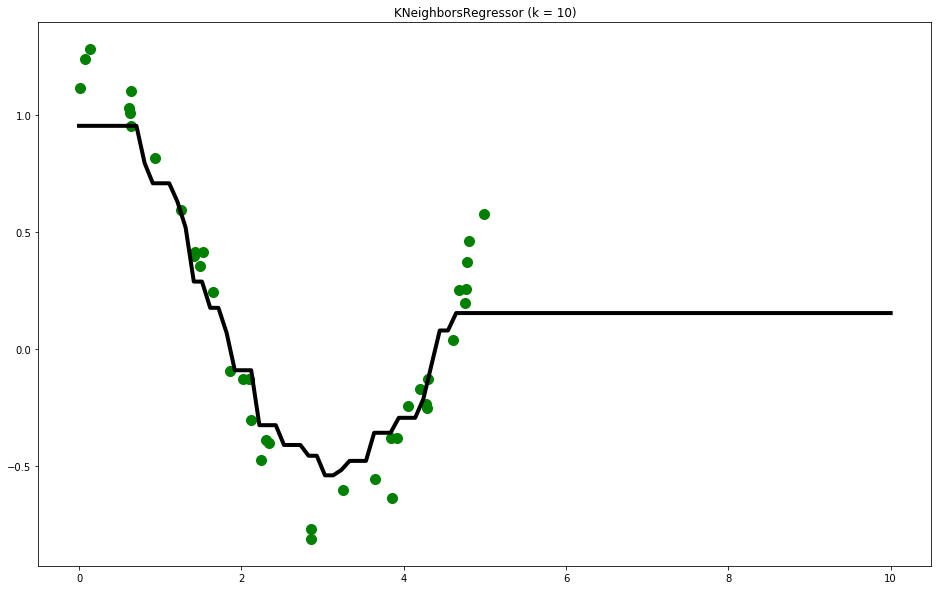

In [63]:
# 画出拟合曲线
plt.figure(figsize=(16, 10))
plt.scatter(X, y, c='g', label='data', s=100)         # 劃出訓練樣本
plt.plot(T, y_pred, c='k', label='prediction', lw=4)  # 劃出擬合曲線
plt.title("KNeighborsRegressor (k = %i)" % k)
plt.show()